# Organoid Viability Quantifications

In [1]:
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = pathlib.Path(r'..\results\best_version')
FILE_DIR = DATA_DIR / 'test_all_imagesOrganoids_comments.xlsx'

In [3]:
org_df = pd.read_excel(FILE_DIR)

In [4]:
org_df.columns

Index(['ImageNumber', 'ObjectNumber', 'Organoid', 'FileName_green_channel',
       'FileName_red_channel', 'PathName_green_channel',
       'PathName_red_channel', 'AreaShape_Area', 'Children_DeadCells_Count',
       'Children_LiveCells_Count', 'Location_Center_X', 'Location_Center_Y',
       'Math_DeadAreaPercentage', 'Math_DeadTotalArea',
       'Math_DetectedTotalArea', 'Math_LiveAreaPercentage',
       'Math_LiveTotalArea', 'Mean_DeadCells_AreaShape_Area',
       'Mean_LiveCells_AreaShape_Area', 'Number_Object_Number',
       'Missing organoids'],
      dtype='object')

In [5]:
def parse_filename(filename):
    preorg_line, region = filename.split('.')[0].split(' ')[:2]
    org_line = preorg_line[-4:]
    treatment = preorg_line[:-4]

    return (treatment, org_line, region.lower())

In [6]:
org_df['treatment'], org_df['org_line'], org_df['region'] = zip(*org_df.FileName_green_channel.apply(parse_filename, ))

In [7]:
org_df['is_organoid'] = org_df.Organoid.isnull()

for col in ['Math_DeadAreaPercentage', 'Math_DeadTotalArea',
            'Math_LiveAreaPercentage', 'Math_LiveTotalArea',
            'Mean_DeadCells_AreaShape_Area', 'Mean_LiveCells_AreaShape_Area',
            'AreaShape_Area', 'Children_DeadCells_Count', 'Children_LiveCells_Count', 
            'Math_DetectedTotalArea']:
    org_df[col].fillna(0, inplace=True)

In [11]:
pixel_size_dict = {'1219': 0.690, '1220': 0.690, '1225': 0.690, '1224': 0.930, '1221': 0.930, '1223': 0.690}

org_df['pixel_area'] = org_df.org_line.apply(lambda x: pixel_size_dict[x] ** 2)
org_df['area'] = org_df['AreaShape_Area'] * org_df['pixel_area']
org_df['detected_area'] = org_df['Math_DetectedTotalArea'] * org_df['pixel_area']
org_df['dead_area'] = org_df['Math_DeadTotalArea'] * org_df['pixel_area']
org_df['live_area'] = org_df['Math_LiveTotalArea'] * org_df['pixel_area']
org_df['equivalent_diameter'] = 2 * np.sqrt(org_df['area'] / np.pi)

In [13]:
for val in ['area', 'detected_area', 'dead_area', 'live_area']:
    org_df[val + '_in_square_mm'] = org_df[val].apply(lambda x: x / (10 ** 6))

In [14]:
org_df['live_detected_percentage'] = 100 * org_df['Math_LiveTotalArea'] / org_df['Math_DetectedTotalArea']
org_df['dead_detected_percentage'] = 100 * org_df['Math_DeadTotalArea'] / org_df['Math_DetectedTotalArea']

org_df['live_detected_percentage'].fillna(0, inplace=True)
org_df['dead_detected_percentage'].fillna(0, inplace=True)

In [15]:
org_df.head()

,ImageNumber,ObjectNumber,Organoid,FileName_green_channel,FileName_red_channel,PathName_green_channel,PathName_red_channel,AreaShape_Area,Children_DeadCells_Count,Children_LiveCells_Count,...,detected_area,dead_area,live_area,equivalent_diameter,live_detected_percentage,dead_detected_percentage,area_in_square_mm,detected_area_in_square_mm,dead_area_in_square_mm,live_area_in_square_mm
0,1,1,NaN,Ndr1219 hilar viability staining.czi,Ndr1219 hilar viability staining.czi,C:\Users\agucor\OneDrive - Karolinska Institut...,C:\Users\agucor\OneDrive - Karolinska Institut...,90972,7,1,...,32906.6037,3923.5401,32849.9478,234.832403,99.827828,11.923261,0.043312,0.032907,0.003924,0.032850
1,1,2,NaN,Ndr1219 hilar viability staining.czi,Ndr1219 hilar viability staining.czi,C:\Users\agucor\OneDrive - Karolinska Institut...,C:\Users\agucor\OneDrive - Karolinska Institut...,45586,0,2,...,17181.9729,0.0000,17181.9729,166.234015,100.000000,0.000000,0.021703,0.017182,0.000000,0.017182
2,1,3,NaN,Ndr1219 hilar viability staining.czi,Ndr1219 hilar viability staining.czi,C:\Users\agucor\OneDrive - Karolinska Institut...,C:\Users\agucor\OneDrive - Karolinska Institut...,56222,1,3,...,15699.3975,3701.2014,13565.0412,184.610881,86.404852,23.575436,0.026767,0.015699,0.003701,0.013565
3,1,4,NaN,Ndr1219 hilar viability staining.czi,Ndr1219 hilar viability staining.czi,C:\Users\agucor\OneDrive - Karolinska Institut...,C:\Users\agucor\OneDrive - Karolinska Institut...,4500,0,0,...,0.0000,0.0000,0.0000,52.228843,0.000000,0.000000,0.002142,0.000000,0.000000,0.000000
4,1,5,NaN,Ndr1219 hilar viability staining.czi,Ndr1219 hilar viability staining.czi,C:\Users\agucor\OneDrive - Karolinska Institut...,C:\Users\agucor\OneDrive - Karolinska Institut...,20700,0,1,...,6937.7292,0.0000,6937.7292,112.018389,100.000000,0.000000,0.009855,0.006938,0.000000,0.006938


In [16]:
org_df = org_df.query('is_organoid')

# Filter WT1223 peri
# org_df = org_df.query('FileName_green_channel != "WT1223 peri viability staining.czi"')

org_df.to_excel(DATA_DIR / 'Organoid_Quantification.xlsx')

In [19]:
with pd.ExcelWriter(DATA_DIR / 'Organoid_Quantification_separated.xlsx') as writer:
    for this_vals, this_df in org_df.groupby(['treatment', 'region', 'org_line']):
        this_df.to_excel(writer, sheet_name=' '.join(this_vals))

# Glossary

*  area: Area of the organoid in squared micrometers.

*  detected_area: area in squared micrometers corresponding to classified pixels (live, dead or both)

*  equivalent_diameter: estimate of diameter corresponding to a round organoid with the same area.

*  Math_DeadAreaPercentage: Percentage of organoid area classified as dead.

*  Math_LiveAreaPercentage: Percentage of organoid area classified as live.

*  dead_area: area in squared micrometers corresponding to dead.

*  live_area: area in squared micrometers corresponding to live.

*  dead_detected_percentage: Percentage of detected pixels classified as dead.

*  live_detected_percentage: Percentage of detected pixels classified as live.

# Plotting and Observations

In [12]:
import seaborn as sns

How many organoids do we have?

Are there any differences per condition?

In [13]:
org_df.treatment.value_counts()

WT     177
Ndr    146
Name: treatment, dtype: int64

Text(0, 0.5, 'Quantity')

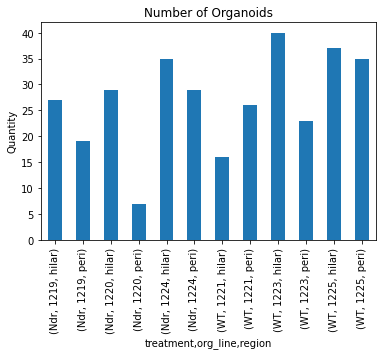

In [14]:
org_df.groupby(['treatment', 'org_line', 'region'])['is_organoid'].sum().plot(kind='bar')

plt.title('Number of Organoids')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

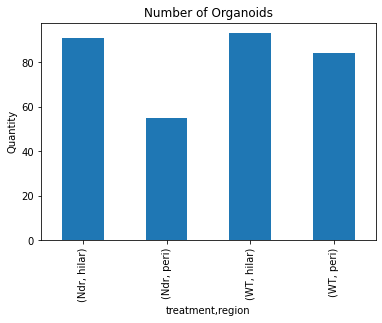

In [15]:
org_df.groupby(['treatment', 'region'])['is_organoid'].sum().plot(kind='bar')

plt.title('Number of Organoids')
plt.ylabel('Quantity')

## What about the sizes of the organoids?

C:\Users\agucor\Anaconda3\envs\gral\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Organoid Size')

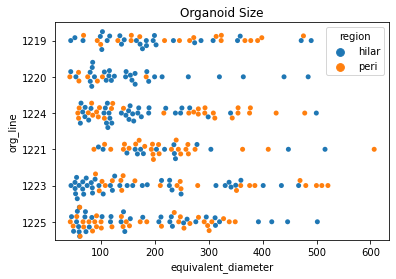

In [16]:
sns.swarmplot(data=org_df, x='equivalent_diameter', y='org_line', hue='region')
plt.title('Organoid Size')

Text(0.5, 1.0, 'Organoid Size')

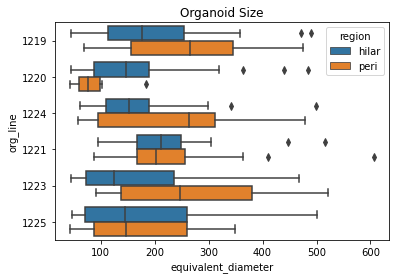

In [17]:
sns.boxplot(data=org_df, x='equivalent_diameter', y='org_line', hue='region')
plt.title('Organoid Size')

Text(0.5, 1.0, 'Organoid Size')

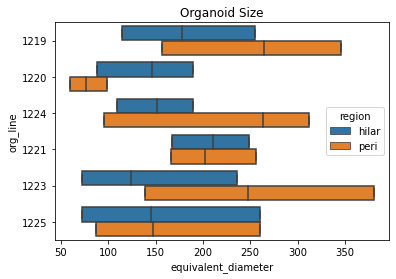

In [18]:
sns.boxplot(data=org_df, x='equivalent_diameter', y='org_line', hue='region', whis=0, showfliers=False)
plt.title('Organoid Size')

Text(0.5, 1.0, 'Organoid Size')

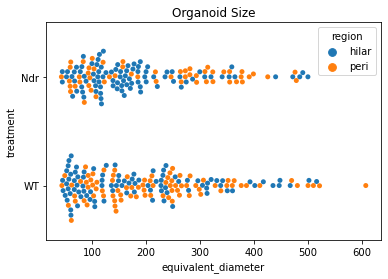

In [19]:
sns.swarmplot(data=org_df, x='equivalent_diameter', y='treatment', hue='region')
plt.title('Organoid Size')

Text(0.5, 1.0, 'Organoid Size')

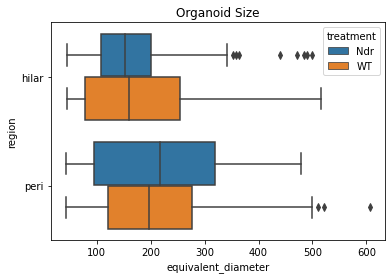

In [20]:
sns.boxplot(data=org_df, x='equivalent_diameter', y='region', hue='treatment')
plt.title('Organoid Size')

# Viability

## Dead area as percentage of whole organoid

We could make a violin plot of percentage of dead area in each organoid. The problem with this is that most organoids have 0% dead area, so there is a big population in 0 which then results in a negative tail reaching negative impossible numbers. Also, having a single point with an extreme value generates a long tail.

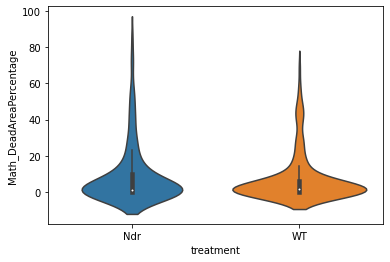

In [21]:
sns.violinplot(data=org_df, y='Math_DeadAreaPercentage', x='treatment')
plt.savefig(DATA_DIR / 'all_organoids_violinplot.png')

Another possibility would be to use a strip plot. We don't have a problem with negative values, but so many points superposed in the 0 value makes it difficult to interpret. The advantage is that we get an idea of the spread over the other values.

<AxesSubplot:xlabel='org_line', ylabel='Math_DeadAreaPercentage'>

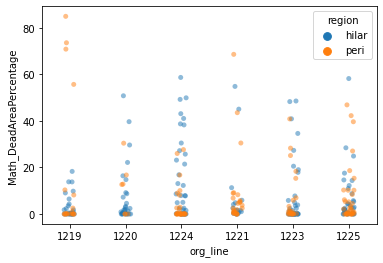

In [22]:
sns.stripplot(data=org_df, y='Math_DeadAreaPercentage', x='org_line', hue='region', alpha=0.5)

We were wondering whether bigger organoids had more dead area due to lumen containing dead cells. We can plot dead area percentage vs equivalent diameter. We could first separate plots by every condition to compare what we see in different images to what s quantified.

Another question that should be addressed is if dead area percentage dynamic range is different among the different images, and if this happens, if it is due to red dynamic range or because there is something different across conditions.

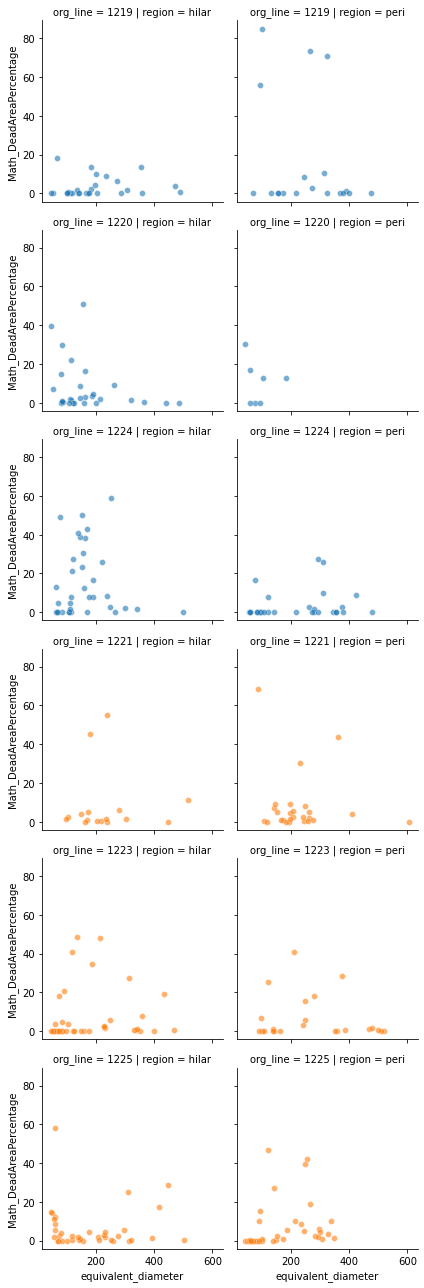

In [23]:
sea = sns.FacetGrid(org_df, col="region", row="org_line", hue="treatment")
# map the above form facetgrid with some attributes  
sea.map_dataframe(sns.scatterplot, x="equivalent_diameter", y="Math_DeadAreaPercentage", alpha = .6)
plt.savefig(DATA_DIR / 'dead_area_vs_organoid_diameter.png')

WT 1223 and WT 1225 have many organoids with high percentage of dead area. We have discussed this separately and made notes about it. These images show a cell death pattern in the periphery of the organoids, but show very little punctutate cell death patterns. Organoid lines WT 1221, Ndr 1224, Ndr 1220 and Ndr 1219 show puncta (cells) with bright red signal, in many cases this signal is located in the lumen. 

In my opinion, this looks like a different cell death pattern between these two sets of lines. The analysis I did to base my opinion (opinion as I would like to have more technical replicates to be sure) is:

- Imagine WT 1223 and WT 1225 have extremely little cell death;

- Then the dynamic range of the red channel is pushed to really low values because the brightest signal actually corresponds to background signal belonging to the periphery of the organoids (differences in imaging could have contributed so we compared images taken on the same day)

- As the red channel has a different dynamic range, the background from the periphery cells looks the brightest and is confused as dead signal.

If these three conditions were met, we should be able to see the background red signal at the periphery of other organoids imaged the same day in similar conditions. I couldn't find a clear signal in these images to be completely sure that this is the case. In conclusion, I think this dead signal corresponds to either dead or dying cells.

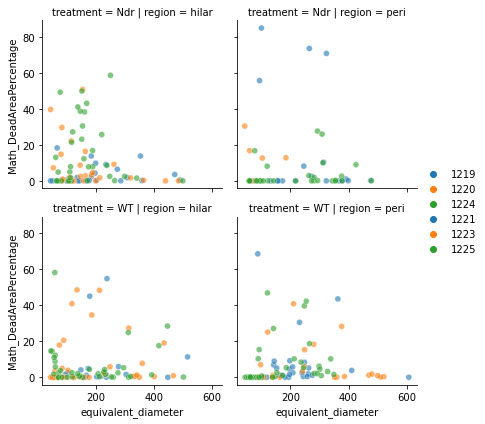

In [24]:
sea = sns.FacetGrid(org_df, col="region", row="treatment")
# map the above form facetgrid with some attributes  
sea.map_dataframe(sns.scatterplot, x="equivalent_diameter", y="Math_DeadAreaPercentage", alpha = .6, hue="org_line")
sea.add_legend()

*Note*: Organoids smaller than 400 um of equivalent diameter reach dead area percentages higher than 30%.

We could choose a global threshold to classify organoids as dead/dying (if we agree that dead area percentage is statistically comparable in the different images) and count how many organoids we have in one or the other state.

Let's say that we choose 15% dead area percentage of the organoid as a global threshold.

In [25]:
org_df['is_dead'] = org_df['Math_DeadAreaPercentage'] > 15

Text(0.5, 1.0, 'Dying Organoids')

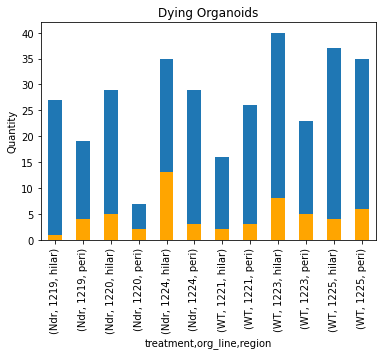

In [26]:
org_df.groupby(['treatment', 'org_line', 'region'])['is_organoid'].sum().plot(kind='bar')
org_df.groupby(['treatment', 'org_line', 'region'])['is_dead'].sum().plot(kind='bar', color='orange')
plt.ylabel('Quantity')
plt.title('Dying Organoids')

Text(0.5, 1.0, 'Dying Organoids')

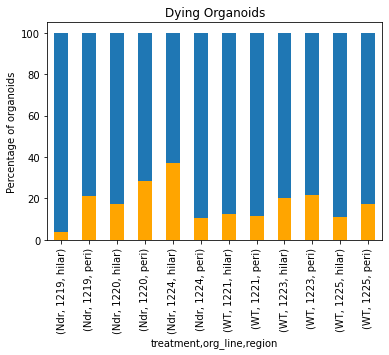

In [27]:
proportions_base = org_df.groupby(['treatment', 'org_line', 'region'])['is_organoid'].sum() / org_df.groupby(['treatment', 'org_line', 'region'])['is_organoid'].sum() * 100
proportions = org_df.groupby(['treatment', 'org_line', 'region'])['is_dead'].sum() / org_df.groupby(['treatment', 'org_line', 'region'])['is_organoid'].sum() * 100
proportions_base.plot(kind='bar')
proportions.plot(kind='bar', color='orange')
plt.ylabel('Percentage of organoids')
plt.title('Dying Organoids')

Text(0.5, 1.0, 'Dying Organoids')

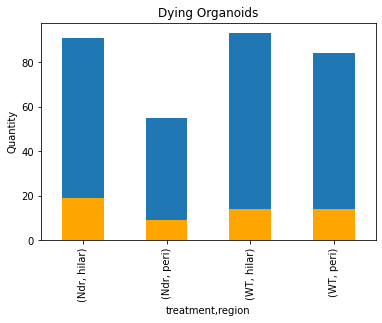

In [28]:
proportions_base = org_df.groupby(['treatment', 'region'])['is_organoid'].sum()
proportions = org_df.groupby(['treatment', 'region'])['is_dead'].sum()
proportions_base.plot(kind='bar')
proportions.plot(kind='bar', color='orange')
plt.ylabel('Quantity')
plt.title('Dying Organoids')

Text(0.5, 1.0, 'Dying Organoids')

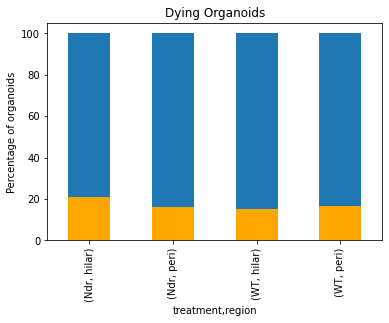

In [29]:
proportions_base = org_df.groupby(['treatment', 'region'])['is_organoid'].sum() / org_df.groupby(['treatment', 'region'])['is_organoid'].sum() * 100
proportions = org_df.groupby(['treatment', 'region'])['is_dead'].sum() / org_df.groupby(['treatment', 'region'])['is_organoid'].sum() * 100
proportions_base.plot(kind='bar')
proportions.plot(kind='bar', color='orange')
plt.ylabel('Percentage of organoids')
plt.title('Dying Organoids')

## Live area percentage vs dead area percentage

We could also look into the possibility that having higher percentage of area classified as live results in lower percentage classified as dead, or any relation between these variables.

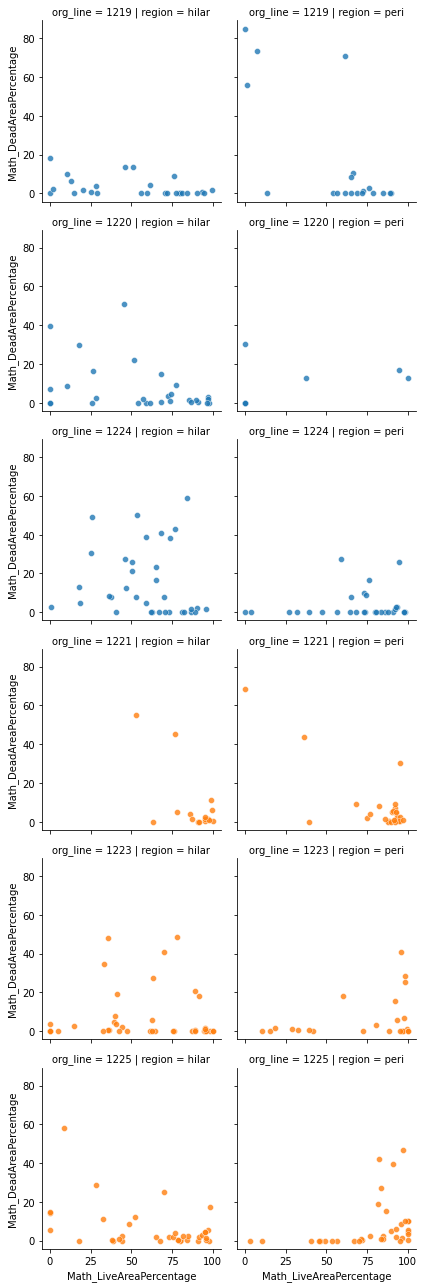

In [30]:
sea = sns.FacetGrid(org_df, col="region", row="org_line", hue="treatment")
# map the above form facetgrid with some attributes  
sea.map_dataframe(sns.scatterplot, x="Math_LiveAreaPercentage", y="Math_DeadAreaPercentage", alpha = .8)

We should note here that there are organoids that have few pixels classified as either live nor dead as both Dead area percentage and live area percentage values are really low. This favors the usage of live / detected pixels and dead / detected pixels.

## Dead area as percentage of detected pixels

The first couple of garphs are analogous to what we see for dead area as percentage of total organoid area.

<AxesSubplot:xlabel='treatment', ylabel='dead_detected_percentage'>

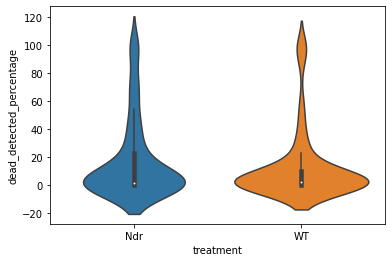

In [31]:
sns.violinplot(data=org_df, y='dead_detected_percentage', x='treatment')

Again the problem with violin plot is that it's yielding values above 100% and below 0% which don't make sense.

<AxesSubplot:xlabel='org_line', ylabel='dead_detected_percentage'>

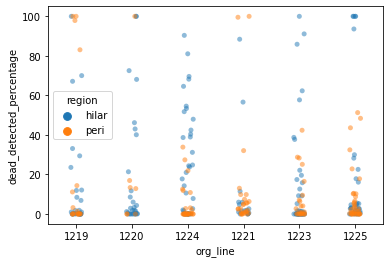

In [32]:
sns.stripplot(data=org_df, y='dead_detected_percentage', x='org_line', hue='region', alpha=0.5)

The advantage of strip plot is that it's showing how values now spread between 0% (lot's of superposed points) and some other values with 100%. This means that the dynamic range of this variable is higher.

### Dead area as percentage of detected pixels vs live area as percentage of detected pixels

We are going to analyze now pixels that have been classified either as dead and/or live.

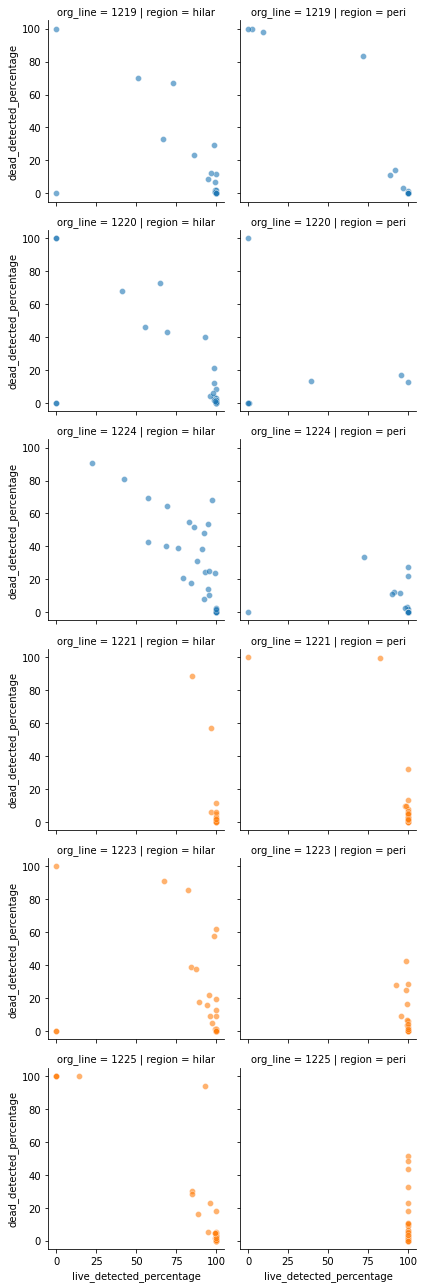

In [33]:
sea = sns.FacetGrid(org_df, col="region", row="org_line", hue="treatment")
# map the above form facetgrid with some attributes  
sea.map_dataframe(sns.scatterplot, x="live_detected_percentage", y="dead_detected_percentage", alpha = .6)

It's good to see that in most of the images, when there are more pixels classified as dead, less pixels are classified as live. This is not the case for most of the WT peripheral region organoids. The reason for this might be that the green channel is overexposed in some images and is saturating. Either way, it is not very problemati to have pixels with both signals as superposition of cells in axial direction, nearby cells can explain this phenomena and it is also described in the bibliography.

*Note*: Check what are thos organoids with almost 0% of live and dead signals.

## Dead area as percentage of detected pixels according to size

We should take into consideration that sometimes, small organoids can have high percentage of dead area. It is also possible that big organoids have low percentage of dead detected pixels when only the lumen or the periphery are classified as dead, while the whole organoid is classified as live.

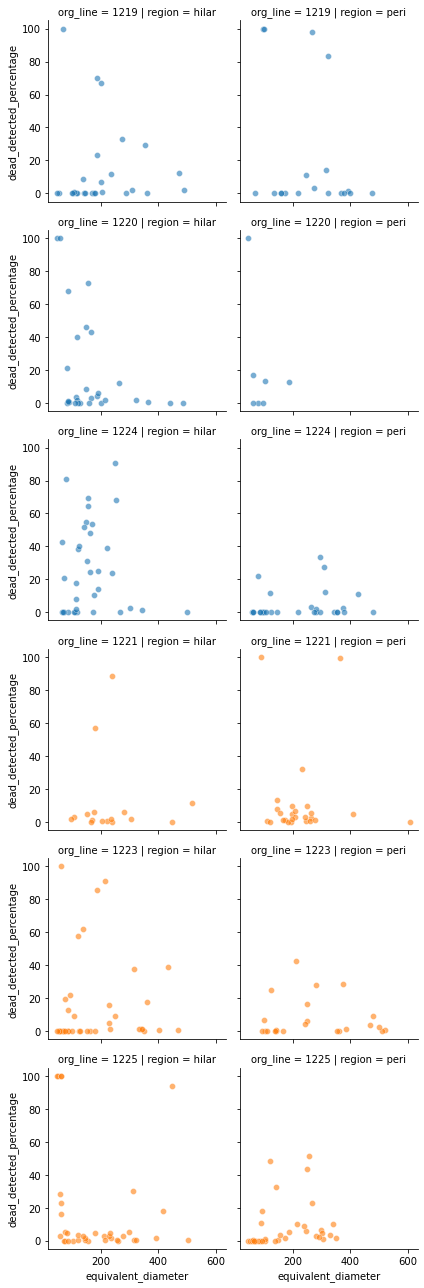

In [34]:
sea = sns.FacetGrid(org_df, col="region", row="org_line", hue="treatment")
# map the above form facetgrid with some attributes  
sea.map_dataframe(sns.scatterplot, x="equivalent_diameter", y="dead_detected_percentage", alpha = .6)
plt.savefig(DATA_DIR / 'dead_area_vs_organoid_diameter.png')

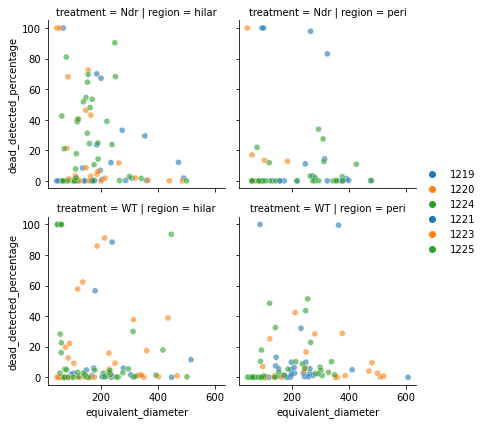

In [35]:
sea = sns.FacetGrid(org_df, col="region", row="treatment")
# map the above form facetgrid with some attributes  
sea.map_dataframe(sns.scatterplot, x="equivalent_diameter", y="dead_detected_percentage", alpha = .6, hue="org_line")
sea.add_legend()

*Note*: Organoids smaller than 400 um equivalent diameter seem to reach higher dead detected percentages in Ndr. In WT the values look more spread out, but here we have 1223 (green) and 1225 (orange) that have high percentage of dead detected areas in periphery and also green channel is overexposed so almost every pixel is detected and classified as live.

Again we could choose a global threshold to separate dying organoids and count how many of each kind we have in each case.

In [36]:
org_df['is_dead'] = org_df['dead_detected_percentage'] > 30

Text(0.5, 1.0, 'Dying Organoids')

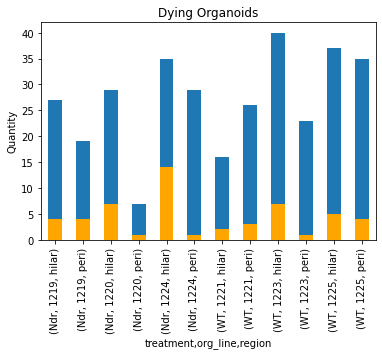

In [37]:
org_df.groupby(['treatment', 'org_line', 'region'])['is_organoid'].sum().plot(kind='bar')
org_df.groupby(['treatment', 'org_line', 'region'])['is_dead'].sum().plot(kind='bar', color='orange')
plt.ylabel('Quantity')
plt.title('Dying Organoids')

Text(0.5, 1.0, 'Dying Organoids')

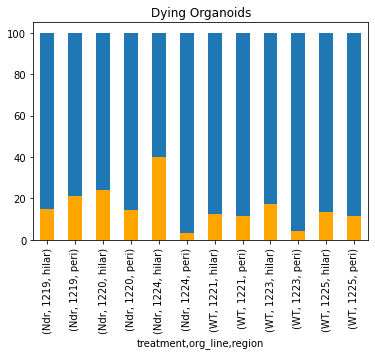

In [38]:
proportions_base = org_df.groupby(['treatment', 'org_line', 'region'])['is_organoid'].sum() / org_df.groupby(['treatment', 'org_line', 'region'])['is_organoid'].sum() * 100
proportions = org_df.groupby(['treatment', 'org_line', 'region'])['is_dead'].sum() / org_df.groupby(['treatment', 'org_line', 'region'])['is_organoid'].sum() * 100
proportions_base.plot(kind='bar')
proportions.plot(kind='bar', color='orange')
plt.title('Dying Organoids')

Text(0.5, 1.0, 'Dying Organoids')

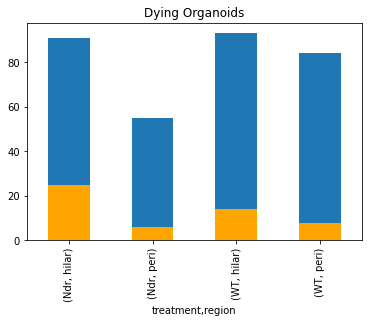

In [39]:
proportions_base = org_df.groupby(['treatment', 'region'])['is_organoid'].sum()
proportions = org_df.groupby(['treatment', 'region'])['is_dead'].sum()
proportions_base.plot(kind='bar')
proportions.plot(kind='bar', color='orange')
plt.title('Dying Organoids')

Text(0.5, 1.0, 'Dying Organoids')

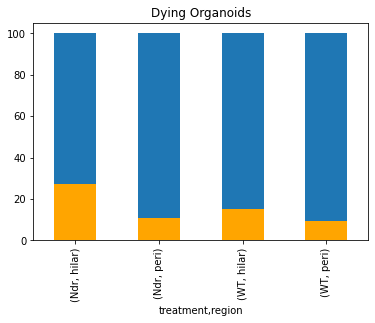

In [40]:
proportions_base = org_df.groupby(['treatment', 'region'])['is_organoid'].sum() / org_df.groupby(['treatment', 'region'])['is_organoid'].sum() * 100
proportions = org_df.groupby(['treatment', 'region'])['is_dead'].sum() / org_df.groupby(['treatment', 'region'])['is_organoid'].sum() * 100
proportions_base.plot(kind='bar')
proportions.plot(kind='bar', color='orange')
plt.title('Dying Organoids')

<AxesSubplot:xlabel='treatment'>

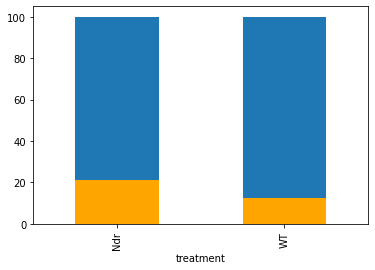

In [41]:
proportions_base = org_df.groupby(['treatment'])['is_organoid'].sum() / org_df.groupby(['treatment'])['is_organoid'].sum() * 100
proportions = org_df.groupby(['treatment'])['is_dead'].sum() / org_df.groupby(['treatment'])['is_organoid'].sum() * 100
proportions_base.plot(kind='bar')
proportions.plot(kind='bar', color='orange')

# Pair plot

Although it's really confusing to look at, a pair plot of every variable against each other is a quick way of corroborating if some hypothesis make sense or not. The diagonal has the histograms of the variable separate according to the hue (Ndr vs WT).

*Note*: live or dead_detected_percentage vs equivalent diameter quickly shows that smaller organoids are the only ones that can reach ~100% dead percentage or 0% live percentage.

*Note*: detected_area vs area gives an idea of how many organoids don't have all their pixels classified as either live nor dead.

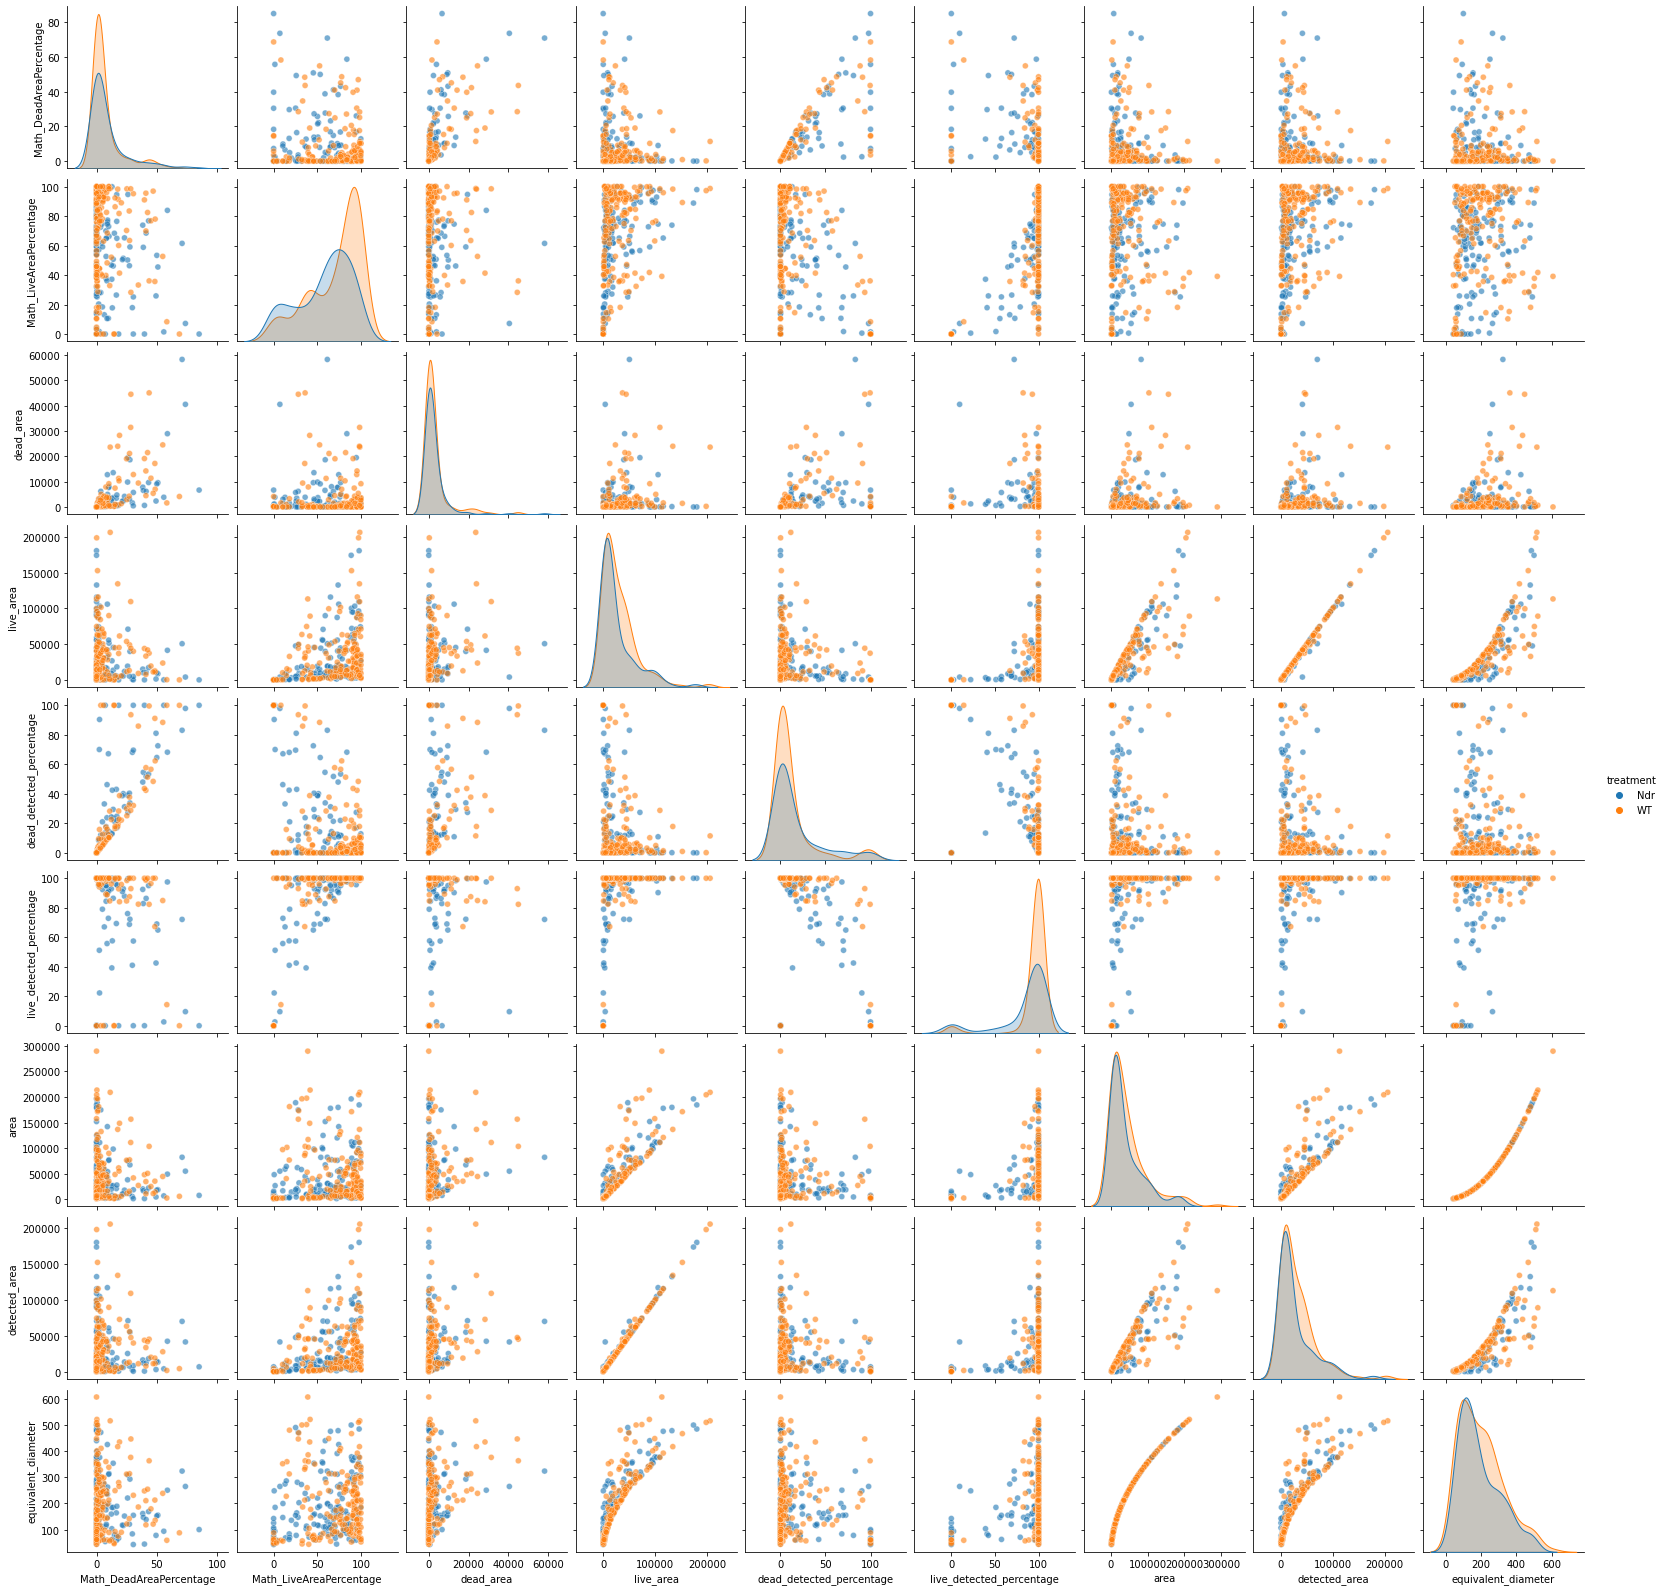

In [42]:
sns.pairplot(org_df, vars=['Math_DeadAreaPercentage', 'Math_LiveAreaPercentage', 'dead_area', 'live_area', 'dead_detected_percentage', 'live_detected_percentage', 'area', 'detected_area', 'equivalent_diameter'], hue='treatment', plot_kws={'alpha': 0.6})

# Sum of Areas

As a general idea, we can sum the areas classified as live or areas classified as dead to have an overall impression of the different images.

Text(0.5, 1.0, 'Total Dead Area')

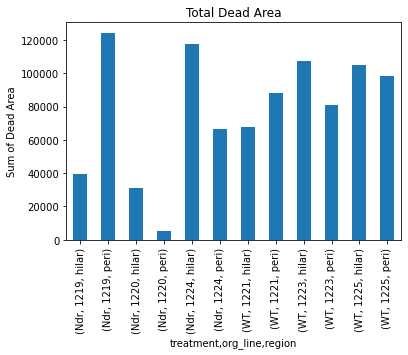

In [43]:
org_df.groupby(['treatment', 'org_line', 'region']).dead_area.sum().plot(kind='bar')
plt.ylabel('Sum of Dead Area')
plt.title('Total Dead Area')

Text(0.5, 1.0, 'Total Live Area')

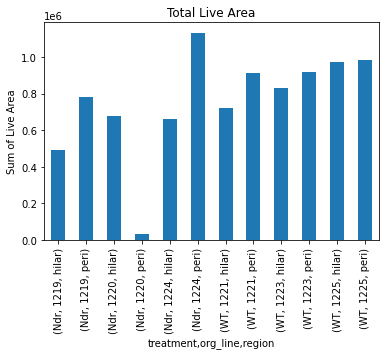

In [44]:
org_df.groupby(['treatment', 'org_line', 'region']).live_area.sum().plot(kind='bar')
plt.ylabel('Sum of Live Area')
plt.title('Total Live Area')

Text(0.5, 1.0, 'Total Live Area')

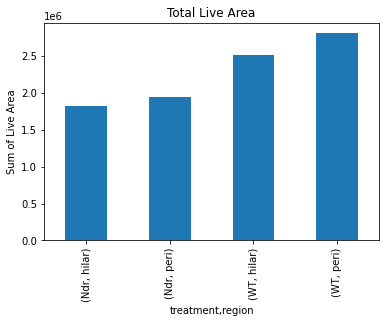

In [45]:
org_df.groupby(['treatment', 'region']).live_area.sum().plot(kind='bar')
plt.ylabel('Sum of Live Area')
plt.title('Total Live Area')

Text(0.5, 1.0, 'Percentage of dead area compared to detected area')

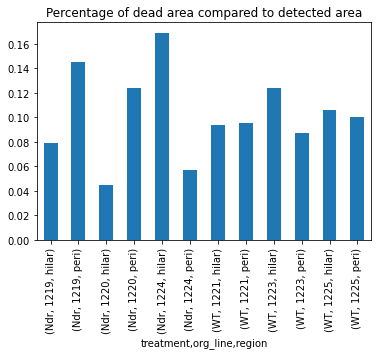

In [46]:
(org_df.groupby(['treatment', 'org_line', 'region']).dead_area.sum() / org_df.groupby(['treatment', 'org_line', 'region']).detected_area.sum()).plot(kind='bar')
plt.title('Percentage of dead area compared to detected area')

Text(0.5, 1.0, 'Percentage of dead area compared to organoid area')

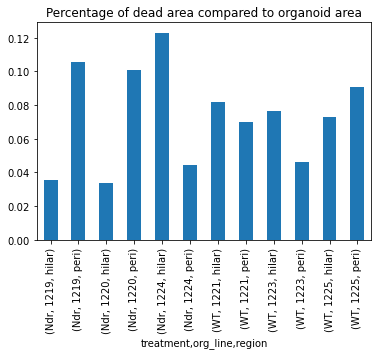

In [47]:
(org_df.groupby(['treatment', 'org_line', 'region']).dead_area.sum() / org_df.groupby(['treatment', 'org_line', 'region']).area.sum()).plot(kind='bar')
plt.title('Percentage of dead area compared to organoid area')